# Final Project

# SOLUTIONS

# Getting the Data

## 🥊 Challenge: Find the Data

Use `os.listdir()` to see the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Fundamentals" folder. Using Pandas' `read_csv()` method, read in all three data frames and assign them to the three variables defined below.

💡 **Tip**: Remember how to move up in the folder structure? `../../` goes up two folders!

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

In [1]:
# YOUR CODE HERE
import pandas as pd
df_eng = pd.read_csv('../../data/chis_data/chis_eng.csv')
df_esp = pd.read_csv('../../data/chis_data/chis_esp.csv')
df_other = pd.read_csv('../../data/chis_data/chis_other.csv')

## 🥊 Challenge: Concatenate

Look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the three DataFrames we have now. Save the concatenated list in a new variable called `df`.

In [2]:
# YOUR CODE HERE
df = pd.concat([df_eng,df_esp,df_other])


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many numeric columns are there in the dataset?
3. Which columns look interesting to you?

In [3]:
# YOUR CODE HERE
print(df.shape)
df.head()

(22160, 20)


,ethnicity,age,gender,edu_attainment,fam_size,general_health,diabetes,high_blood_pr,overweight,doctor_visits_lastyear,fruit_perweek,veg_perweek,cur_insured,feel_left_out,difficult_concentrating,poverty_level,household_tenure,feel_safe_neighborhood,voting_freq_presid,interview_language
0,"WHITE, NON-HISPANIC (NH)",35-39 YEARS,MALE,MA OR MS DEGREE,1,EXCELLENT,NO,NO,NO,O TIME,3,0,YES,INAPPLICABLE,NO,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,ALWAYS,ENGLISH
1,"WHITE, NON-HISPANIC (NH)",70-74 YEARS,MALE,PH.D. OR EQUIVALENT,1,VERY GOOD,NO,NO,NO,1 TIMES,4,2,YES,SOME OF THE TIME,NO,300% FPL AND ABOVE,OWN,ALL OF THE TIME,ALWAYS,ENGLISH
2,OTHER/TWO OR MORE RACES,30-34 YEARS,FEMALE,BA OR BS DEGREE/SOME GRAD SCHOOL,2,VERY GOOD,NO,NO,NO,9-12 TIMES,21,20,YES,INAPPLICABLE,NO,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,SOME OF THE TIME,ALWAYS,ENGLISH
3,"WHITE, NON-HISPANIC (NH)",75-79 YEARS,MALE,MA OR MS DEGREE,1,GOOD,NO,NO,YES,1 TIMES,7,4,YES,HARDLY EVER,NO,100-199% FPL,OWN,MOST OF THE TIME,INAPPLICABLE,ENGLISH
4,"WHITE, NON-HISPANIC (NH)",35-39 YEARS,MALE,VOCATIONAL SCHOOL,2,GOOD,NO,NO,YES,O TIME,6,6,YES,INAPPLICABLE,NO,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ALL OF THE TIME,SOMETIMES,ENGLISH


# Data Processing

## 🥊 Challenge: Exploratory Data Analysis (EDA)

Now let's do some Exploratory Data Analysis. One thing we will want to do is count values of interesting features. Run `value_counts()` on the `feel_left_out` column and normalize the output.


In [4]:
# YOUR CODE HERE
df['feel_left_out'].value_counts(normalize=True)


INAPPLICABLE        0.618457
HARDLY EVER         0.298375
SOME OF THE TIME    0.071119
OFTEN               0.011688
PROXY SKIPPED       0.000361
Name: feel_left_out, dtype: float64


One thing we will want to do is look at potential correlations between features that we think might be interesting to pursue further. 

Pick two of them, then 



## 🥊 Challenge: Quantiles

We can use the `quantile()` method to calculate the q-th quantile of the data along a specified axis. Try to find the amount of fruits eaten by the top 1% of respondents.

In [5]:
# YOUR CODE HERE

df['fruit_perweek'].quantile(0.99)

28.0

## 🥊 Challenge: Cross-tabulate
We can use the `crosstab()` method to cross-tabulate poverty level and health. 

In [6]:
pd.crosstab(index=df['poverty_level'], columns=df['general_health'])

general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,230,407,653,153,482
100-199% FPL,336,575,961,168,783
200-299% FPL,376,393,960,90,981
300% FPL AND ABOVE,3245,1068,3931,218,6150


Look at the crosstab [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and look for aruments that allow you to get the normalized values, and include subtotals.

Get the cross tab of `poverty_level` and `general_health`. Normalize them and print the subtotals. 

In [7]:
# YOUR CODE HERE

pd.crosstab(index=df['poverty_level'], columns=df['general_health'],
            normalize='index',margins=True)


general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,0.119481,0.211429,0.339221,0.079481,0.250390
100-199% FPL,0.119022,0.203684,0.340418,0.059511,0.277365
200-299% FPL,0.134286,0.140357,0.342857,0.032143,0.350357
300% FPL AND ABOVE,0.222078,0.073091,0.269025,0.014919,0.420887
All,0.188944,0.110244,0.293547,0.028384,0.378881


## 🥊 Challenge: Grouping

Use `groupby()` to get the **means** of the amount of veggies eaten per week (`veg_perweek`) when grouping by `general_health`. Sort the mean from small to large.

In [8]:
# YOUR CODE HERE
df['veg_perweek'].groupby(df['general_health']).mean().sort_values()


general_health
FAIR         5.848547
POOR         5.976153
GOOD         6.095619
VERY GOOD    6.506551
EXCELLENT    7.116312
Name: veg_perweek, dtype: float64

## 🥊 Challenge: Visualizing Correlations

Let's try to find out if there's a correspondence between `fruit_perweek` and `veg_perweek`.

Getting the correlations between features is done using `.corr()`. Look up how it works and try it out!

In [9]:
# YOUR CODE HERE
df.fruit_perweek.corr(df.veg_perweek)

0.7615651737599495

Use Pandas' `.plot()` method to visualize the correlation with a scatterplot.

💡 **Tip**: Use the argument `type=scatter` to get a scatterplot.

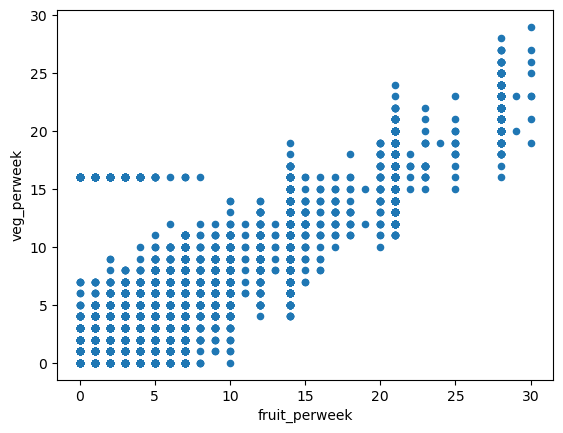

In [10]:
# YOUR CODE HERE
df.plot(kind='scatter', x='fruit_perweek', y='veg_perweek');
